In [ ]:
! pip install matplotlib

  Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from pathlib import Path
import nltk
import re
import json
nltk.download('punkt')

In [ ]:
# --- Configuration ---
DATA_DIR = Path('../data')
OUTPUT_DIR = Path('../notebooks/output')
OUTPUT_DIR.mkdir(exist_ok=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91966\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Found 1 cleaned text file(s): ['AI_Training_Document_cleaned.txt']
Created 3 chunks from AI_Training_Document_cleaned.txt

--- Chunk 1 (276 words) ---
User Agreement 
1. Introduction 
This User Agreement, the Mobile Application Terms of Use, and all policies and additional terms 
posted on and in our sites, applications, tools, and services (collectively "Services") set out the terms 
on which eBay offers you access to and use of our Services. You can find an overview of our policies 
here. The Mobile Application Terms of Use, all policies, and ...

--- Chunk 2 (274 words) ---
It also contains an Agreement to Arbitrate which will, with limited 
exception, require you to submit claims you have against us or related third parties to binding and 
final arbitration, unless you opt out of the Agreement to Arbitrate in accordance with section 19.B.9 
(see Legal Disputes, Section B ("Agreement to Arbitrate")). If you do not opt out: (1) you will only be 
permitted to pursue cl...

--- Chunk 3

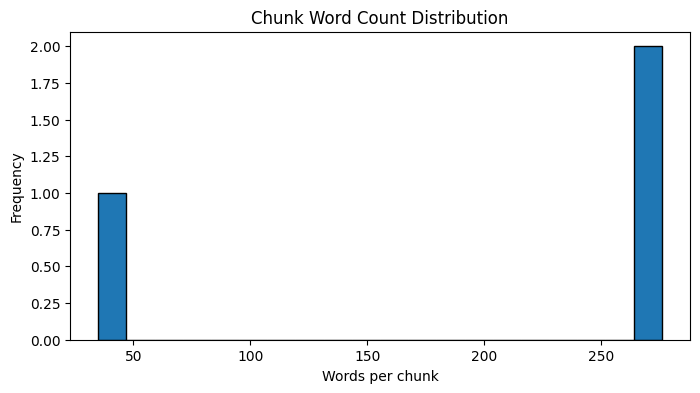

In [ ]:

# --- Helper functions ---
def clean_text(text: str) -> str:
    text = re.sub(r'\r', '\n', text)
    text = re.sub(r'\n{2,}', '\n', text)
    text = re.sub(r' {2,}', ' ', text)
    return text.strip()


def chunk_text_sentence_aware(text: str, min_words: int = 100, max_words: int = 300):
    sentences = nltk.sent_tokenize(text)
    chunks = []
    current, current_words = [], 0
    for sent in sentences:
        w = len(sent.split())
        if current_words + w > max_words:
            if current_words >= min_words:
                chunks.append(' '.join(current).strip())
                current = [sent]
                current_words = w
            else:
                current.append(sent)
                chunks.append(' '.join(current).strip())
                current, current_words = [], 0
        else:
            current.append(sent)
            current_words += w
    if current:
        chunks.append(' '.join(current).strip())
    return chunks


# --- Load cleaned text from previous notebook ---
cleaned_files = list(OUTPUT_DIR.glob('*_cleaned.txt'))
print(f"Found {len(cleaned_files)} cleaned text file(s):", [p.name for p in cleaned_files])


if cleaned_files:
    sample_path = cleaned_files[0]
    text = sample_path.read_text(encoding='utf-8')
    chunks = chunk_text_sentence_aware(text)
    print(f"Created {len(chunks)} chunks from {sample_path.name}")


    # Inspect a few chunks
    for i, ch in enumerate(chunks[:3]):
        print(f"\n--- Chunk {i+1} ({len(ch.split())} words) ---\n{ch[:400]}...")


    # Save all chunks for reference
    out_json = OUTPUT_DIR / f"{sample_path.stem}_chunks.jsonl"
    with open(out_json, 'w', encoding='utf-8') as f:
        for i, ch in enumerate(chunks):
            rec = {"id": i, "text": ch, "word_count": len(ch.split())}
            f.write(json.dumps(rec, ensure_ascii=False) + '\n')
    print(f"\nSaved chunk data to {out_json}")


import matplotlib.pyplot as plt


if cleaned_files:
    lengths = [len(ch.split()) for ch in chunks]
    plt.figure(figsize=(8, 4))
    plt.hist(lengths, bins=20, edgecolor='black')
    plt.title('Chunk Word Count Distribution')
    plt.xlabel('Words per chunk')
    plt.ylabel('Frequency')
    plt.show()
